# CoverMyMeds Project
### Authors: Shuo Xu

### Abstract

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

#### Import data

In [3]:
df_bridge = pd.read_csv('bridge.csv')
df_claims = pd.read_csv('dim_claims.csv')
df_date = pd.read_csv('dim_date.csv')
df_pa = pd.read_csv('dim_pa.csv')

In [4]:
df_bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [5]:
df_bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dim_claim_id  1335576 non-null  int64  
 1   dim_pa_id     555951 non-null   float64
 2   dim_date_id   1335576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 MB


In [6]:
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


In [7]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [8]:
df_pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [9]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555951 entries, 0 to 555950
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dim_pa_id          555951 non-null  int64
 1   correct_diagnosis  555951 non-null  int64
 2   tried_and_failed   555951 non-null  int64
 3   contraindication   555951 non-null  int64
 4   pa_approved        555951 non-null  int64
dtypes: int64(5)
memory usage: 21.2 MB


In [10]:
df_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [11]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dim_date_id     1520 non-null   int64 
 1   date_val        1520 non-null   object
 2   calendar_year   1520 non-null   int64 
 3   calendar_month  1520 non-null   int64 
 4   calendar_day    1520 non-null   int64 
 5   day_of_week     1520 non-null   int64 
 6   is_weekday      1520 non-null   int64 
 7   is_workday      1520 non-null   int64 
 8   is_holiday      1520 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 107.0+ KB


#### Exploratory Analysis

In [15]:
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


#### Get the list of insurance companies

In [46]:
Company = []
for i in range(len(df_claims.bin.unique())):
    Company.append(str(df_claims.bin.unique()[i]))
Company

['417380', '999001', '417740', '417614']

#### Get the list of drugs

In [31]:
Drug = []
for i in range(len(df_claims.drug.unique())):
    Drug.append(df_claims.drug.unique()[i])
Drug

['A', 'B', 'C']

#### Get the list of Rejection Codes.

#### We assume that if the claim is approved, then the reject code is 0.

In [33]:
df_claims = df_claims.fillna(0)
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75,0
1,2,999001,A,0,1
2,3,417740,A,76,0
3,4,999001,A,0,1
4,5,417740,A,0,1


In [34]:
Rej_Code = []
for i in range(len(df_claims.reject_code.unique())):
    Rej_Code.append(df_claims.reject_code.unique()[i])
Rej_Code

[75.0, '0', 76.0, 70.0]

#### Graph the claim approval rates for each drug.

In [37]:
App_Rate_Drug = []
for i in range(len(Drug)):
    app = df_claims[(df_claims.drug==Drug[i])]['pharmacy_claim_approved'].sum()
    tot = df_claims[(df_claims.drug==Drug[i])]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Drug.append(rate)
App_Rate_Drug

[0.58, 0.55, 0.64]

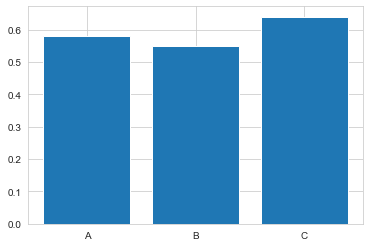

In [41]:
plt.bar(Drug, App_Rate_Drug)
plt.show()

#### Graph the approval rates for each insurance company.

In [44]:
App_Rate_Company = []
for i in range(len(Company)):
    app = df_claims[(df_claims.bin==Company[i])]['pharmacy_claim_approved'].sum()
    tot = df_claims[(df_claims.bin==Company[i])]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Company.append(rate)
App_Rate_Company

[0.23, 0.9, 0.46, 0.21]

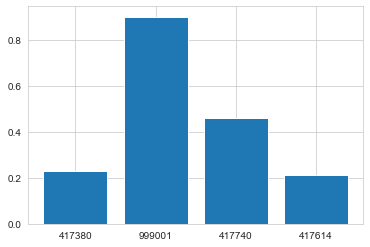

In [47]:
plt.bar(Company, App_Rate_Company)
plt.show()

#### Get the pa approval rates for each diagnosis status.

#### Get the list of diagnosis status.

In [52]:
Diag_Status = []
for i in range(len(df_pa.correct_diagnosis.unique())):
    Diag_Status.append(df_pa.correct_diagnosis.unique()[i])
Diag_Status

[1, 0]

In [53]:
App_Rate_Diag = []
for i in range(len(Diag_Status)):
    app = df_pa[(df_pa.correct_diagnosis==Diag_Status[i])]['pa_approved'].sum()
    tot = df_pa[(df_pa.correct_diagnosis==Diag_Status[i])]['pa_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Diag.append(rate)
App_Rate_Diag

[0.74, 0.7]

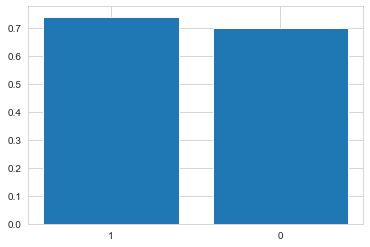

In [81]:
plt.bar(['1','0'], App_Rate_Diag)
plt.show()

#### Get the pa approval rate for each tried_and_failed status.

#### Get the list of tried and failed status.

In [61]:
TF_Status = []
for i in range(len(df_pa.tried_and_failed.unique())):
    TF_Status.append(df_pa.tried_and_failed.unique()[i])
TF_Status

[1, 0]

In [83]:
test = df_pa.groupby('tried_and_failed')["pa_approved"].sum()/df_pa.tried_and_failed.value_counts()
test = test.to_numpy()

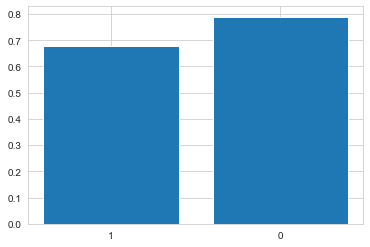

In [84]:
plt.bar(['1','0'], test)
plt.show()

#### Get the pa approval rate for each contradiction status.

In [66]:
Contra_Status = []
for i in range(len(df_pa.contraindication.unique())):
    Contra_Status.append(df_pa.contraindication.unique()[i])
Contra_Status

[0, 1]

In [85]:
test = df_pa.groupby('contraindication')["pa_approved"].sum()/df_pa.contraindication.value_counts()
test = test.to_numpy()

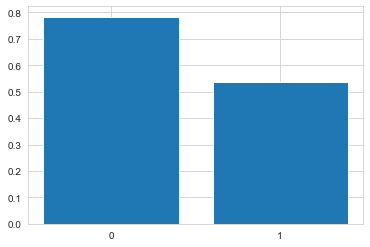

In [86]:
plt.bar(['0','1'], test)
plt.show()

#### Get the pa approval rates for each rejection code. We need to join the claim table and the pa table.

In [70]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])

In [71]:
result1.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1.0,1,417380,A,75,0
1,2,NaN,1,999001,A,0,1
2,3,2.0,1,417740,A,76,0
3,4,NaN,1,999001,A,0,1
4,5,NaN,1,417740,A,0,1


In [72]:
result2 = pd.merge(df_pa,result1,how="left", on=["dim_pa_id"])

In [73]:
result2.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1,1,0,1,1,1,417380,A,75,0
1,2,1,0,0,1,3,1,417740,A,76,0
2,3,0,0,1,1,10,1,417380,A,75,0
3,4,1,1,0,1,11,1,999001,A,76,0
4,5,0,1,0,1,15,1,417614,A,70,0


In [76]:
test = result2.groupby('reject_code')["pa_approved"].sum()/result2.reject_code.value_counts()
test = test.to_numpy()

In [78]:
result2.reject_code.value_counts()

70.0    252206
75.0    217351
76.0     86394
Name: reject_code, dtype: int64

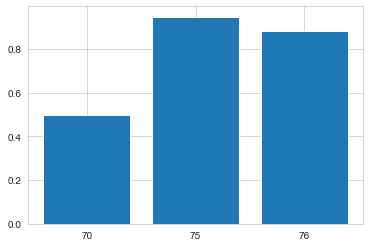

In [80]:
plt.bar(['70','75','76'], test)
plt.show()